# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [44]:
#Your code here - import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('Lego_dataset_cleaned.csv')
display(df.info())
display(df.head())
list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


None

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1½-3',
 'ages_1½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birds™',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comics™ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONS™',
 'theme_name_DUPLO®',
 'theme_name_Dilophosaurus Outpost Attack',
 'theme_name_Disn

In [45]:
#Your code here - Manipulate column names
replacements = [(' ', '_'), ('-','_'), ('.',''),("'",""),('™', ''), ('®',''), ('+','plus'), ('½','half')]

def correct_col_name(col):
    for old, new in replacements:
        col = col.replace(old, new)
    return col

df.columns = [correct_col_name(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [46]:
#Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)
train, test = train_test_split(df)
print('Training Set nobs:', len(train)) 
display(train.head())
print('Testing Set nobs:', len(test))
display(test.head())

Training Set nobs: 8152


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7397,-0.495587,12.1878,-0.203018,0.564601,0.368848,0.761617,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2799,-0.362047,14.8122,-0.091306,0.216064,-0.045687,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10627,-0.330767,32.9278,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4947,0.288812,97.5878,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
926,-0.510024,30.3924,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Testing Set nobs: 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
2481,-0.491978,19.4922,-0.398512,-3.269306,-3.154699,-1.974478,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10309,0.399495,115.9971,-0.370585,1.087407,0.368848,-0.847850,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1315,-0.605066,18.2878,0.215900,-0.132473,-0.874757,-1.169744,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,-0.271817,29.9900,-0.091306,0.913138,-0.045687,-0.043117,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8581,-0.445058,168.8700,0.160044,0.390333,-0.874757,-0.847850,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
#Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     548.4
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:12:16   Log-Likelihood:                -40487.
No. Observations:                8152   AIC:                         8.116e+04
Df Residuals:                    8057   BIC:                         8.183e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         7.318e+12   2.09e+13      0.350      0.726   -3.37e+13    4.83e+13
piece_count                                         75.6860      0.890     85.006      0.000      73.941      77.431
num_reviews                                          6.5916      0.669      9.847      0.000       5.279       7.904
play_star_rating                                     5.5044      0.626      8.788      0.000       4.277       6.732
star_rating                                         -1.3090      0.708     -1.848      0.065      -2.698       0.079
val_star_rating                                     -8.7342      0.629    -13.884      0.000      -9.967      -7.501
ages_10plus                                      -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_10_14                                       -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_10_16                                       -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_10_21                                       -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_11_16                                       -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_12plus                                      -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_12_16                                       -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_14plus                                      -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_16plus                                      -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_1half_3                                      9.099e+10    2.6e+11      0.350      0.726   -4.19e+11    6.01e+11
ages_1half_5                                      9.099e+10    2.6e+11      0.350      0.726   -4.19e+11    6.01e+11
ages_2_5                                          9.099e+10    2.6e+11      0.350      0.726   -4.19e+11    6.01e+11
ages_4plus                                        -6.58e+09   1.88e+10     -0.350      0.726   -4.34e+10    3.03e+10
ages_4_7                                           1.95e+10   5.57e+10      0.350      0.726   -8.98e+10    1.29e+11
ages_4_99                                         -6.58e+09   1.88e+10     -0.350      0.726   -4.34e+10    3.03e+10
ages_5plus                                        1.468e+10    4.2e+10      0.350      0.726   -6.76e+10    9.69e+10
ages_5_12                                        -1.567e+11   4.48e+11     -0.350      0.726   -1.03e+12    7.21e+11
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [48]:
#Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()

p_vals = summary.tables[1]
p_vals = pd.DataFrame(p_vals.data)
p_vals.columns = p_vals.iloc[0]
p_vals = p_vals.drop(0)
p_vals = p_vals.set_index(p_vals.columns[0])
p_vals['P>|t|'] = p_vals['P>|t|'].astype(float)

significant_features = list(p_vals[p_vals['P>|t|'] < 0.05].index)
print('Total Features:', len(p_vals))
print('Significant Features:', len(significant_features))
print(significant_features[:])
p_vals.head()

Total Features: 103
Significant Features: 4
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.318e+12,2.09e+13,0.350,0.726,-3.37e+13,4.83e+13
piece_count,75.6860,0.890,85.006,0.000,73.941,77.431
num_reviews,6.5916,0.669,9.847,0.000,5.279,7.904
play_star_rating,5.5044,0.626,8.788,0.000,4.277,6.732
star_rating,-1.3090,0.708,-1.848,0.065,-2.698,0.079


In [49]:
#Your code here - Refit the model
predictors2 = '+'.join(significant_features)
formula2 = outcome + "~" + predictors2
model2 = ols(formula=formula2, data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     6567.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:12:16   Log-Likelihood:                -42771.
No. Observations:                8152   AIC:                         8.555e+04
Df Residuals:                    8147   BIC:                         8.559e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.5668      0.509    132.696      0.000      66.569      68.565
piece_count         84.9059      0.614    138.244      0.000      83.702      86.110
num_reviews         -3.2549      0.618     -5.267      0.000      -4.466      -2.044
play_star_rating     7.6102      0.583     13.063      0.000       6.468       8.752
val_star_rating    -14.2913      0.579    -24.689      0.000     -15.426     -13.157
==============================================================================
Omnibus:                     8706.936   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1039413.404
Skew:                           5.216   Prob(JB):                         0.00
Kurtosis:                      57.326   Cond. No.                         1.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [50]:
#Your code here - Continue to refine the model
summary = model2.summary()

p_vals = summary.tables[1]
p_vals = pd.DataFrame(p_vals.data)
p_vals.columns = p_vals.iloc[0]
p_vals = p_vals.drop(0)
p_vals = p_vals.set_index(p_vals.columns[0])
p_vals['P>|t|'] = p_vals['P>|t|'].astype(float)

significant_features = list(p_vals[p_vals['P>|t|'] < 0.05].index)
significant_features.remove('Intercept')
print('Total Features:', len(p_vals))
print('Significant Features (excluding Intercept):', len(significant_features))
print(significant_features[:])
p_vals.head()

Total Features: 5
Significant Features (excluding Intercept): 4
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,67.5668,0.509,132.696,0.0,66.569,68.565
piece_count,84.9059,0.614,138.244,0.0,83.702,86.110
num_reviews,-3.2549,0.618,-5.267,0.0,-4.466,-2.044
play_star_rating,7.6102,0.583,13.063,0.0,6.468,8.752
val_star_rating,-14.2913,0.579,-24.689,0.0,-15.426,-13.157


## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [51]:
#Your code here - Code a way to identify multicollinearity
X = df[significant_features]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_features = list(zip(significant_features, vif))
vif_features

[('piece_count', 1.4354381636116418),
 ('num_reviews', 1.4387212769032387),
 ('play_star_rating', 1.3203902895965538),
 ('val_star_rating', 1.3178494728336765)]

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [52]:
#Your code here - Subset features based on multicollinearity
x_cols = [x for x, vif in vif_features if vif < 5]
print('Number of Features:', len(vif_features))
print('Features with VIF < 5:', len(x_cols))

Number of Features: 4
Features with VIF < 5: 4


## Check the Normality Assumption

Check whether the normality assumption holds for your model.

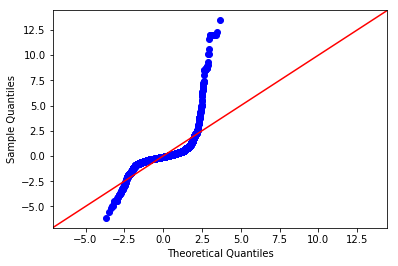

In [53]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

Text(0, 0.5, 'Residuals')

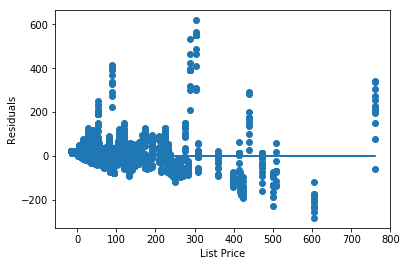

In [54]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model2.predict(train[x_cols]), model2.resid)
plt.plot(model2.predict(train[x_cols]), [0 for i in range(len(train))]);
plt.xlabel('List Price')
plt.ylabel('Residuals')

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

0.9 Percentile: 143.952
0.91 Percentile: 153.986
0.92 Percentile: 170.7878
0.93 Percentile: 182.9878
0.94 Percentile: 198.7929
0.95 Percentile: 220.03032999999942
0.96 Percentile: 251.90543999999994
0.97 Percentile: 292.7878
0.98 Percentile: 359.88
0.99 Percentile: 463.5878


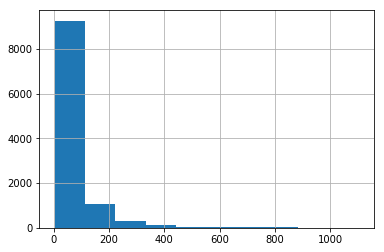

In [55]:
#Your code here - Check for outliers (Model Refinement 1)
df.list_price.hist()

for i in range(90, 100):
    q = i / 100
    print("{} Percentile: {}".format(q, df.list_price.quantile(q=q)))

In [56]:
#Your code here - Rerun the model with extreme outliers removed (Model Refinement 1)
df_refine = df[df.list_price < 400] 
print('Percent Removed:', (len(df) - len(df_refine)) / len(df))
train, test = train_test_split(df_refine)

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model3 = ols(formula=formula, data=train).fit()
model3.summary()

Percent Removed: 0.01655933762649494


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     8537.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:12:17   Log-Likelihood:                -37716.
No. Observations:                8017   AIC:                         7.544e+04
Df Residuals:                    8012   BIC:                         7.548e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           63.6276      0.300    212.112      0.000      63.040      64.216
piece_count         70.9508      0.442    160.560      0.000      70.085      71.817
num_reviews         -0.9418      0.366     -2.577      0.010      -1.658      -0.225
play_star_rating     5.2181      0.345     15.126      0.000       4.542       5.894
val_star_rating     -8.8542      0.345    -25.684      0.000      -9.530      -8.178
==============================================================================
Omnibus:                     4822.338   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106139.706
Skew:                           2.474   Prob(JB):                         0.00
Kurtosis:                      20.125   Cond. No.                         2.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

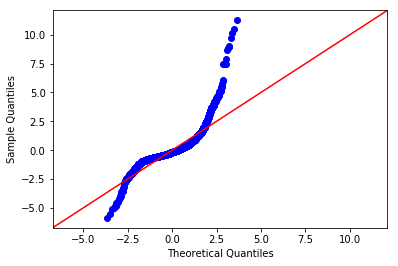

In [57]:
#Your code here - Check normality and homoscedasticity assumptions (Model Refinement 1)
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

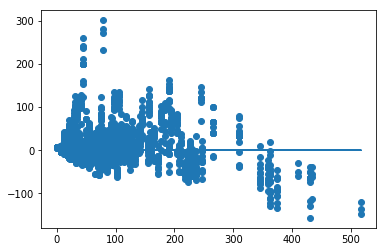

In [58]:
#Your code here - Check normality and homoscedasticity assumptions (Model Refinement 1)
plt.scatter(model3.predict(train[x_cols]), model3.resid)
plt.plot(model3.predict(train[x_cols]), [0 for i in range(len(train))]);

0.9 Percentile: 129.87
0.91 Percentile: 139.98996
0.92 Percentile: 146.3878
0.93 Percentile: 158.58780000000004
0.94 Percentile: 176.8878
0.95 Percentile: 195.139
0.96 Percentile: 207.3878
0.97 Percentile: 239.90375999999998
0.98 Percentile: 268.3878
0.99 Percentile: 311.95642200000003


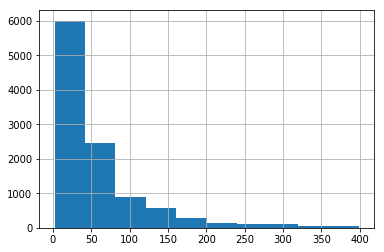

In [59]:
#Your code here - Check for outliers (Model Refinement 2)
df_refine.list_price.hist()

for i in range(90, 100):
    q = i / 100
    print("{} Percentile: {}".format(q, df_refine.list_price.quantile(q=q)))

In [60]:
#Your code here - Rerun the model with log transformation added (Model Refinement 2)
print('Percent Removed:', (len(df_refine) - len(df_refine)) / len(df_refine))
df_refine.list_price = df_refine.list_price.map(np.log)
train, test = train_test_split(df_refine)

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model4 = ols(formula=formula, data=train).fit()
model4.summary()

Percent Removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2630.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:12:18   Log-Likelihood:                -7040.7
No. Observations:                8017   AIC:                         1.409e+04
Df Residuals:                    8012   BIC:                         1.413e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7173      0.007    568.828      0.000       3.705       3.730
piece_count          0.8602      0.010     88.967      0.000       0.841       0.879
num_reviews         -0.0434      0.008     -5.307      0.000      -0.059      -0.027
play_star_rating     0.1463      0.008     19.396      0.000       0.131       0.161
val_star_rating     -0.2018      0.008    -26.687      0.000      -0.217      -0.187
==============================================================================
Omnibus:                      669.376   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.036
Skew:                          -0.663   Prob(JB):                    1.71e-215
Kurtosis:                       4.096   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

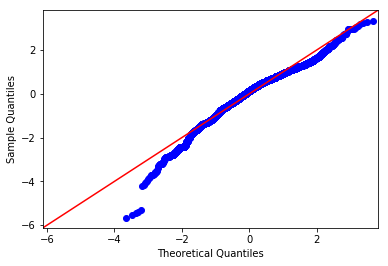

In [61]:
#Your code here - Check normality and homoscedasticity assumptions (Model Refinement 2)
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

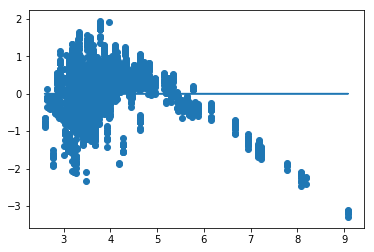

In [62]:
#Your code here - Check normality and homoscedasticity assumptions (Model Refinement 2)
plt.scatter(model4.predict(train[x_cols]), model4.resid)
plt.plot(model4.predict(train[x_cols]), [0 for i in range(len(train))]);

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 